In [3]:
import pandas as pd

df = pd.read_csv('data/train_ag.csv')
df_train = df[['f1_gender', 'f1_age', 'f2_gender', 'f2_age', 'kin_relation']]

df = pd.read_csv('data/val_ag.csv')
df_val = df[['f1_gender', 'f1_age', 'f2_gender', 'f2_age', 'kin_relation']]

df = pd.read_csv('data/test_ag.csv')
df_test = df[['f1_gender', 'f1_age', 'f2_gender', 'f2_age', 'kin_relation']]

## Verifying if the Kin Relation makes sense based on the gender and age

In [4]:
def masc(row, f):
    return row[f+'_gender'] == 'male'
def fem(row, f):
    return row[f+'_gender'] == 'female'

In [5]:
def check_relation(row):
    
    if row['kin_relation'] in ['bb', 'fs', 'gfgs']:
        return masc(row, 'f1') and masc(row, 'f2') # Both male
    
    elif row['kin_relation'] in ['ss', 'md', 'gmgd']:
        return fem(row, 'f1') and fem(row, 'f2') # Both female
    
    elif row['kin_relation'] == 'sibs':
        return ( masc(row, 'f1') and fem(row, 'f2') ) or fem(row, 'f1') and masc(row, 'f2') # Bro-sis or Sis-bro
    
    elif row['kin_relation'] in ['fd', 'gfgd']:
        if row['f1_age'] > row['f2_age']:
            return masc(row, 'f1') and fem(row, 'f2')
        else:
            return fem(row, 'f1') and masc(row, 'f2')
        
    elif row['kin_relation'] in ['ms', 'gmgs']:
        if row['f1_age'] > row['f2_age']:
            return fem(row, 'f1') and masc(row, 'f2')
        else:
            return masc(row, 'f1') and fem(row, 'f2')

In [6]:
df_train['correct'] = df_train.apply(check_relation, axis=1)
df_val['correct'] = df_val.apply(check_relation, axis=1)
df_test['correct'] = df_val.apply(check_relation, axis=1)

/tmp/ipykernel_34051/2693354420.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['correct'] = df_val.apply(check_relation, axis=1)


## Results

In [7]:
train_accuracy = (df_train['correct'].sum() / len(df_train)) * 100
val_accuracy = (df_val['correct'].sum() / len(df_val)) * 100
test_accuracy = (df_test['correct'].sum() / len(df_test)) * 100

print(f'Train dataset accuracy: {train_accuracy:.2f}%')
print(f'Validation dataset accuracy: {val_accuracy:.2f}%')
print(f'Test dataset accuracy: {test_accuracy:.2f}%')

Train dataset accuracy: 81.81%
Validation dataset accuracy: 73.29%
Test dataset accuracy: 67.23%


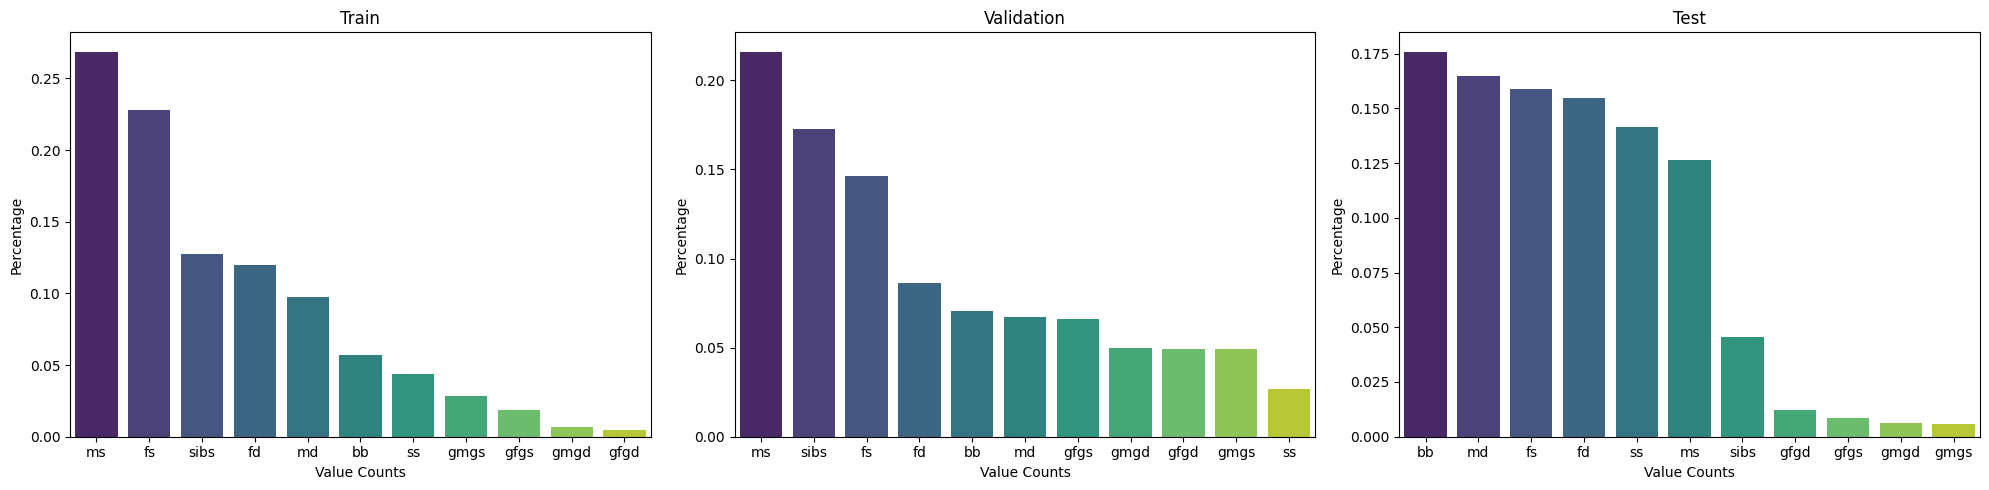

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

value_counts = []
value_counts.append(df_train[df_train['correct'] == False]['kin_relation'].value_counts(normalize=True))
value_counts.append(df_val[df_val['correct'] == False]['kin_relation'].value_counts(normalize=True))
value_counts.append(df_test[df_test['correct'] == False]['kin_relation'].value_counts(normalize=True))
titles = ['Train', 'Validation', 'Test']

fig, axes = plt.subplots(1, 3, figsize=(20, 5))

for i in range(3):
    sns.barplot(x=value_counts[i].index, y=value_counts[i].values, ax=axes[i], palette='viridis')
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Value Counts')
    axes[i].set_ylabel('Percentage')
    #axes[i].xticks(rotation=90)

plt.tight_layout()
plt.show()